# **1 сессия**

## 1.1 Подготвка обучающий и тестовый выборки

Установка библиотека

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from scipy.sparse import csr_matrix, save_npz
warnings.filterwarnings("ignore")

Загрузка данных

In [2]:
# Загрузка данных csv
train = pd.read_csv("/content/train_ses.csv")
test = pd.read_csv("/content/test_ses.csv")

# Загрузка словаря
dict_site = pd.read_pickle('site.pkl')

Смотрим список сайтов

In [3]:
dict_site

{'www.abmecatronique.com': 25075,
 'groups.live.com': 13997,
 'majeureliguefootball.wordpress.com': 42436,
 'cdt46.media.tourinsoft.eu': 30911,
 'www.hdwallpapers.eu': 8104,
 'img378.imageshack.us': 37491,
 'ecologie.nature.free.fr': 5462,
 'www.ibcn.intec.ugent.be': 35425,
 'kissanime.com': 30151,
 'www.carolineconduiteformation.com': 38268,
 'images.mystockphoto.com': 43641,
 'journalph.csphares.qc.ca': 36959,
 'www.uqo.ca': 40935,
 'd8d94e0wul1nb.cloudfront.net': 12346,
 'openapi.elong.com': 31023,
 'flamenco-o.blogspot.com': 31114,
 'www.pages-annuaire.net': 28165,
 'smart2000.pagesperso-orange.fr': 31877,
 'fast.forbes.com': 31070,
 'i1-js-14-3-01-10077-536503633-i.init.cedexis-radar.net': 12938,
 'i1-js-14-3-01-11074-716595896-i.init.cedexis-radar.net': 42002,
 'www.pacajob.com': 5671,
 'mathaa.epfl.ch': 32074,
 'cbv.sfr.bench.cedexis.com': 7104,
 'fbcdn-sphotos-b-a.akamaihd.net': 1939,
 'www.mystere-tv.com': 6708,
 'www.mon-ip.fr': 43589,
 'www.aqua-passion.com': 45241,
 'reunio

Предобработка

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253561 entries, 0 to 253560
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   session_id  253561 non-null  int64  
 1   site1       253561 non-null  int64  
 2   time1       253561 non-null  object 
 3   site2       250098 non-null  float64
 4   time2       250098 non-null  object 
 5   site3       246919 non-null  float64
 6   time3       246919 non-null  object 
 7   site4       244321 non-null  float64
 8   time4       244321 non-null  object 
 9   site5       241829 non-null  float64
 10  time5       241829 non-null  object 
 11  site6       239495 non-null  float64
 12  time6       239495 non-null  object 
 13  site7       237297 non-null  float64
 14  time7       237297 non-null  object 
 15  site8       235224 non-null  float64
 16  time8       235224 non-null  object 
 17  site9       233084 non-null  float64
 18  time9       233084 non-null  object 
 19  si

In [5]:
train.head()

session_id  site1                time1  site2                time2  \
0           1    718  2014-02-20 10:02:45    NaN                  NaN   
1           2    890  2014-02-22 11:19:50  941.0  2014-02-22 11:19:50   
2           3  14769  2013-12-16 16:40:17   39.0  2013-12-16 16:40:18   
3           4    782  2014-03-28 10:52:12  782.0  2014-03-28 10:52:42   
4           5     22  2014-02-28 10:53:05  177.0  2014-02-28 10:55:22   

     site3                time3    site4                time4  site5  ...  \
0      NaN                  NaN      NaN                  NaN    NaN  ...   
1   3847.0  2014-02-22 11:19:51    941.0  2014-02-22 11:19:51  942.0  ...   
2  14768.0  2013-12-16 16:40:19  14769.0  2013-12-16 16:40:19   37.0  ...   
3    782.0  2014-03-28 10:53:12    782.0  2014-03-28 10:53:42  782.0  ...   
4    175.0  2014-02-28 10:55:22    178.0  2014-02-28 10:55:23  177.0  ...   

                 time6    site7                time7    site8  \
0                  NaN      NaN                  NaN      NaN   
1  2014-02-22 11:19:51   3847.0  2014-02-22 11:19:52   3846.0   
2  2013-12-16 16:40:19  14768.0  2013-12-16 16:40:20  14768.0   
3  2014-03-28 10:54:42    782.0  2014-03-28 10:55:12    782.0   
4  2014-02-28 10:55:59    175.0  2014-02-28 10:55:59    177.0   

                 time8    site9                time9   site10  \
0                  NaN      NaN                  NaN      NaN   
1  2014-02-22 11:19:52   1516.0  2014-02-22 11:20:15   1518.0   
2  2013-12-16 16:40:21  14768.0  2013-12-16 16:40:22  14768.0   
3  2014-03-28 10:55:42    782.0  2014-03-28 10:56:12    782.0   
4  2014-02-28 10:55:59    177.0  2014-02-28 10:57:06    178.0   

                time10  target  
0                  NaN       0  
1  2014-02-22 11:20:16       0  
2  2013-12-16 16:40:24       0  
3  2014-03-28 10:56:42       0  
4  2014-02-28 10:57:11       0  

[5 rows x 22 columns]

In [6]:
train.describe()

session_id          site1          site2          site3  \
count  253561.00000  253561.000000  250098.000000  246919.000000   
mean   126781.00000    3243.550144    3272.400883    3303.987757   
std     73196.90014    7247.006212    7307.480404    7347.809918   
min         1.00000       1.000000       1.000000       1.000000   
25%     63391.00000      53.000000      53.000000      53.000000   
50%    126781.00000     677.000000     677.000000     677.000000   
75%    190171.00000    1980.000000    1980.000000    1986.500000   
max    253561.00000   41601.000000   41600.000000   41599.000000   

               site4          site5          site6          site7  \
count  244321.000000  241829.000000  239495.000000  237297.000000   
mean     3325.109422    3343.406035    3352.312637    3395.546771   
std      7371.245606    7379.758550    7380.413775    7435.727671   
min         1.000000       1.000000       1.000000       1.000000   
25%        52.000000      52.000000      52.000000      55.000000   
50%       677.000000     678.000000     679.000000     679.000000   
75%      1995.000000    2054.000000    2077.000000    2197.000000   
max     41599.000000   41599.000000   41600.000000   41600.000000   

               site8          site9         site10         target  
count  235224.000000  233084.000000  231052.000000  253561.000000  
mean     3430.157765    3438.400088    3460.388861       0.009059  
std      7473.417900    7471.062652    7492.447548       0.094747  
min         1.000000       1.000000       1.000000       0.000000  
25%        55.000000      55.000000      55.000000       0.000000  
50%       704.000000     733.000000     733.000000       0.000000  
75%      2287.000000    2366.000000    2403.000000       0.000000  
max     41601.000000   41601.000000   41601.000000       1.000000

Визуализируем и узнаем сколько пропусков в процентах

In [7]:
# Вычислить общее количество строк
total_rows = train.shape[0]

# Вычислить процент пропущенных значений для каждого столбца
missing_values = (train.isnull().sum() / total_rows) * 100

# Вывести столбцы с пропущенными значениями и их проценты
print(missing_values[missing_values > 0])

site2     1.365746
time2     1.365746
site3     2.619488
time3     2.619488
site4     3.644094
time4     3.644094
site5     4.626895
time5     4.626895
site6     5.547383
time6     5.547383
site7     6.414236
time7     6.414236
site8     7.231790
time8     7.231790
site9     8.075769
time9     8.075769
site10    8.877154
time10    8.877154
dtype: float64


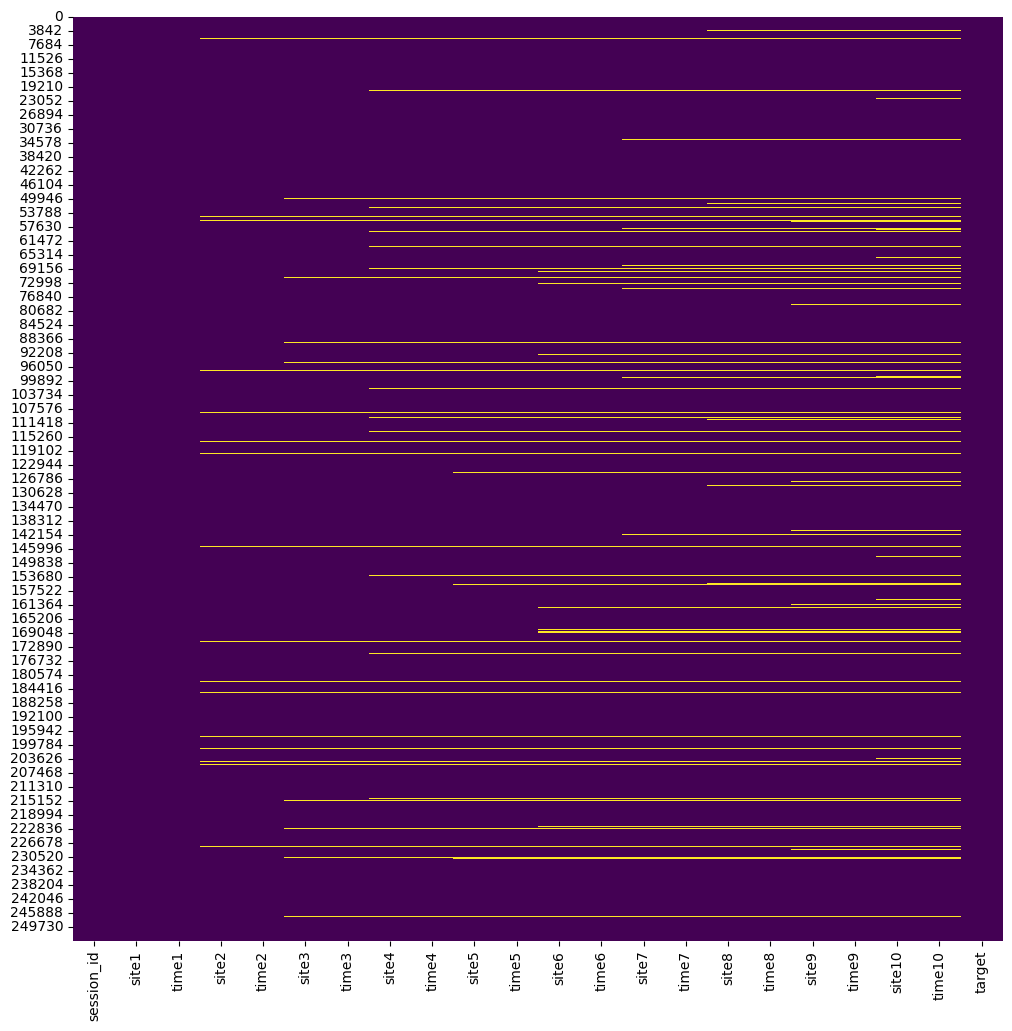

In [8]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(train.isnull(), cbar = False, cmap = 'viridis')
plt.show()

Так пропусков очень маленькое количество, удалю их так как смыслав том чтобы их оставлять ,а только улушит их качество

In [9]:
filtered_train = train.dropna(axis=0)
filtered_test = test.dropna(axis=0)

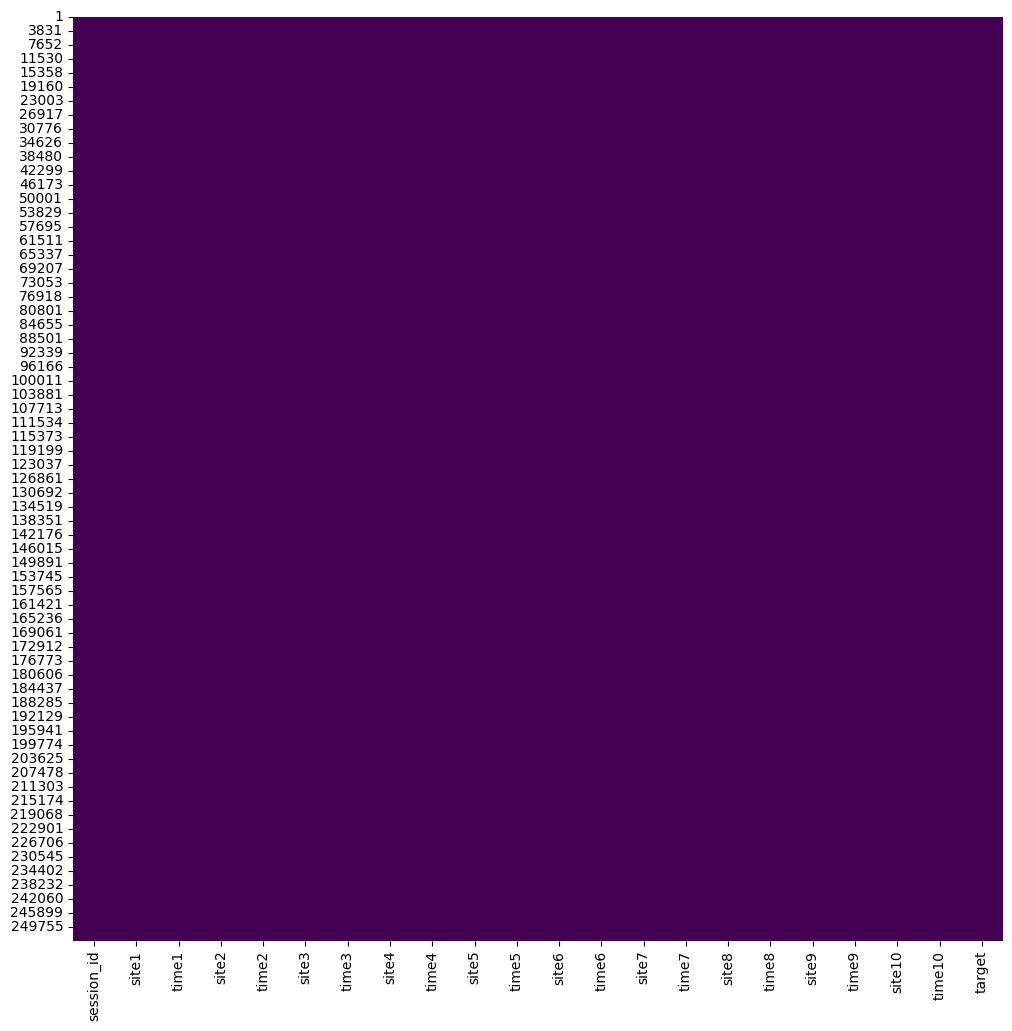

In [10]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(filtered_train.isnull(), cbar = False, cmap = 'viridis')
plt.show()

Дополнительно проверяем остались ли пропуски и видим что их нет

Меняем типы

In [11]:
filtered_train = filtered_train.astype({'site1':'int64', 'site2':'int64','site3':'int64', 'site4':'int64','site5':'int64', 'site6':'int64','site7':'int64', 'site8':'int64','site9':'int64', 'site10':'int64'})

In [12]:
filtered_test = filtered_test.astype({'site1':'int64', 'site2':'int64','site3':'int64', 'site4':'int64','site5':'int64', 'site6':'int64','site7':'int64', 'site8':'int64','site9':'int64', 'site10':'int64'})

In [13]:
filtered_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231052 entries, 1 to 253560
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   session_id  231052 non-null  int64 
 1   site1       231052 non-null  int64 
 2   time1       231052 non-null  object
 3   site2       231052 non-null  int64 
 4   time2       231052 non-null  object
 5   site3       231052 non-null  int64 
 6   time3       231052 non-null  object
 7   site4       231052 non-null  int64 
 8   time4       231052 non-null  object
 9   site5       231052 non-null  int64 
 10  time5       231052 non-null  object
 11  site6       231052 non-null  int64 
 12  time6       231052 non-null  object
 13  site7       231052 non-null  int64 
 14  time7       231052 non-null  object
 15  site8       231052 non-null  int64 
 16  time8       231052 non-null  object
 17  site9       231052 non-null  int64 
 18  time9       231052 non-null  object
 19  site10      231052 non-null 

Добавляем новые колонки

In [14]:
time_columns = ["time1", "time2", "time3", "time4", "time5",
                "time6", "time7", "time8", "time9", "time10"]

def process_time_columns(df, time_columns):
    # Словарь для перевода дней недели
    days_of_week = {
        'Monday': 0,
        'Tuesday': 1,
        'Wednesday': 2,
        'Thursday': 3,
        'Friday': 4,
        'Saturday': 5,
        'Sunday': 6
    }

    # Списки для хранения значений месяца, года и дней недели
    months = []
    years = []
    days = []

    for col in time_columns:
        if col not in df.columns:
            continue

        # Преобразуем в datetime и округляем до минут
        df[col] = pd.to_datetime(df[col], errors='coerce').dt.floor('min')

        # Извлекаем день недели и добавляем в общий список
        days.extend(df[col].dt.day_name().map(days_of_week).dropna().tolist())

        # Извлекаем год и месяц
        years.extend(df[col].dt.year.dropna().tolist())
        months.extend(df[col].dt.month.dropna().tolist())

    # Добавляем общие колонки для года, месяца и дня недели
    df['years'] = pd.Series(years)
    df['months'] = pd.Series(months)
    df['day_of_week'] = pd.Series(days)

    return df

In [15]:
# Применяем первую функцию
filtered_train = process_time_columns(filtered_train, time_columns)
filtered_test = process_time_columns(filtered_test, time_columns)

In [16]:
filtered_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231052 entries, 1 to 253560
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   session_id   231052 non-null  int64         
 1   site1        231052 non-null  int64         
 2   time1        231052 non-null  datetime64[ns]
 3   site2        231052 non-null  int64         
 4   time2        231052 non-null  datetime64[ns]
 5   site3        231052 non-null  int64         
 6   time3        231052 non-null  datetime64[ns]
 7   site4        231052 non-null  int64         
 8   time4        231052 non-null  datetime64[ns]
 9   site5        231052 non-null  int64         
 10  time5        231052 non-null  datetime64[ns]
 11  site6        231052 non-null  int64         
 12  time6        231052 non-null  datetime64[ns]
 13  site7        231052 non-null  int64         
 14  time7        231052 non-null  datetime64[ns]
 15  site8        231052 non-null  int64    

## 1.2 Работа с разряженным форматом данных

In [17]:
def create_bag_of_sites(filtered_train, dict_site, session_length=10):
    # Извлечение сайтов из данных
    site_columns = [f"site{i}" for i in range(1, session_length + 1)]
    sites = filtered_train[site_columns].values

    # Создаем матрицу
    rows, cols = sites.shape
    site_ids = sites.flatten()

    # Преобразуем сайты в индексы из словаря dict_site
    # Убедимся, что индексы начинаются с 1
    col_indices = np.array([dict_site.get(site, 0) for site in site_ids])

    # Удаляем нулевые индексы (если сайт не найден в dict_site)
    mask = col_indices > 0
    row_indices = np.repeat(np.arange(rows), cols)[mask]
    col_indices = col_indices[mask]

    # Формируем разреженную матрицу
    data_sparse = csr_matrix((np.ones(len(row_indices)), (row_indices, col_indices)),
                             shape=(rows, len(dict_site) + 1))  # +1 для учета индексации с 1
    return data_sparse

In [18]:
train_sparse = create_bag_of_sites(filtered_train, dict_site)
test_sparse = create_bag_of_sites(filtered_test, dict_site)

In [19]:
# сохраняем матрицу для дальнейшего использования
save_npz("train_sparse.npz", train_sparse)
save_npz("test_sparse.npz", test_sparse)

## 1.3 отчет

Смотреть в архиве Data.zip

#**2 Сессия**

## 2.1 Визуальный анализ данных

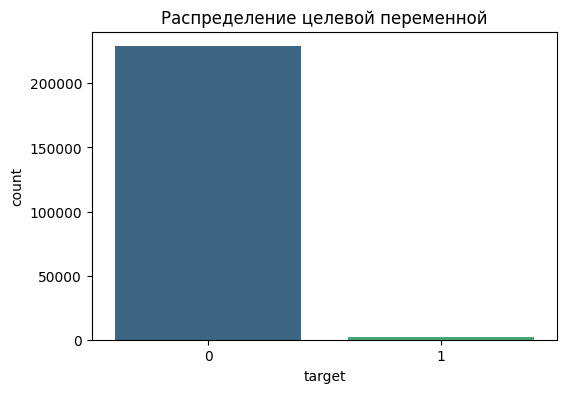

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(data=filtered_train, x="target", palette="viridis")
plt.title("Распределение целевой переменной")
plt.show()

Это график показывает что в данных имееться большой классовый дисбаланс

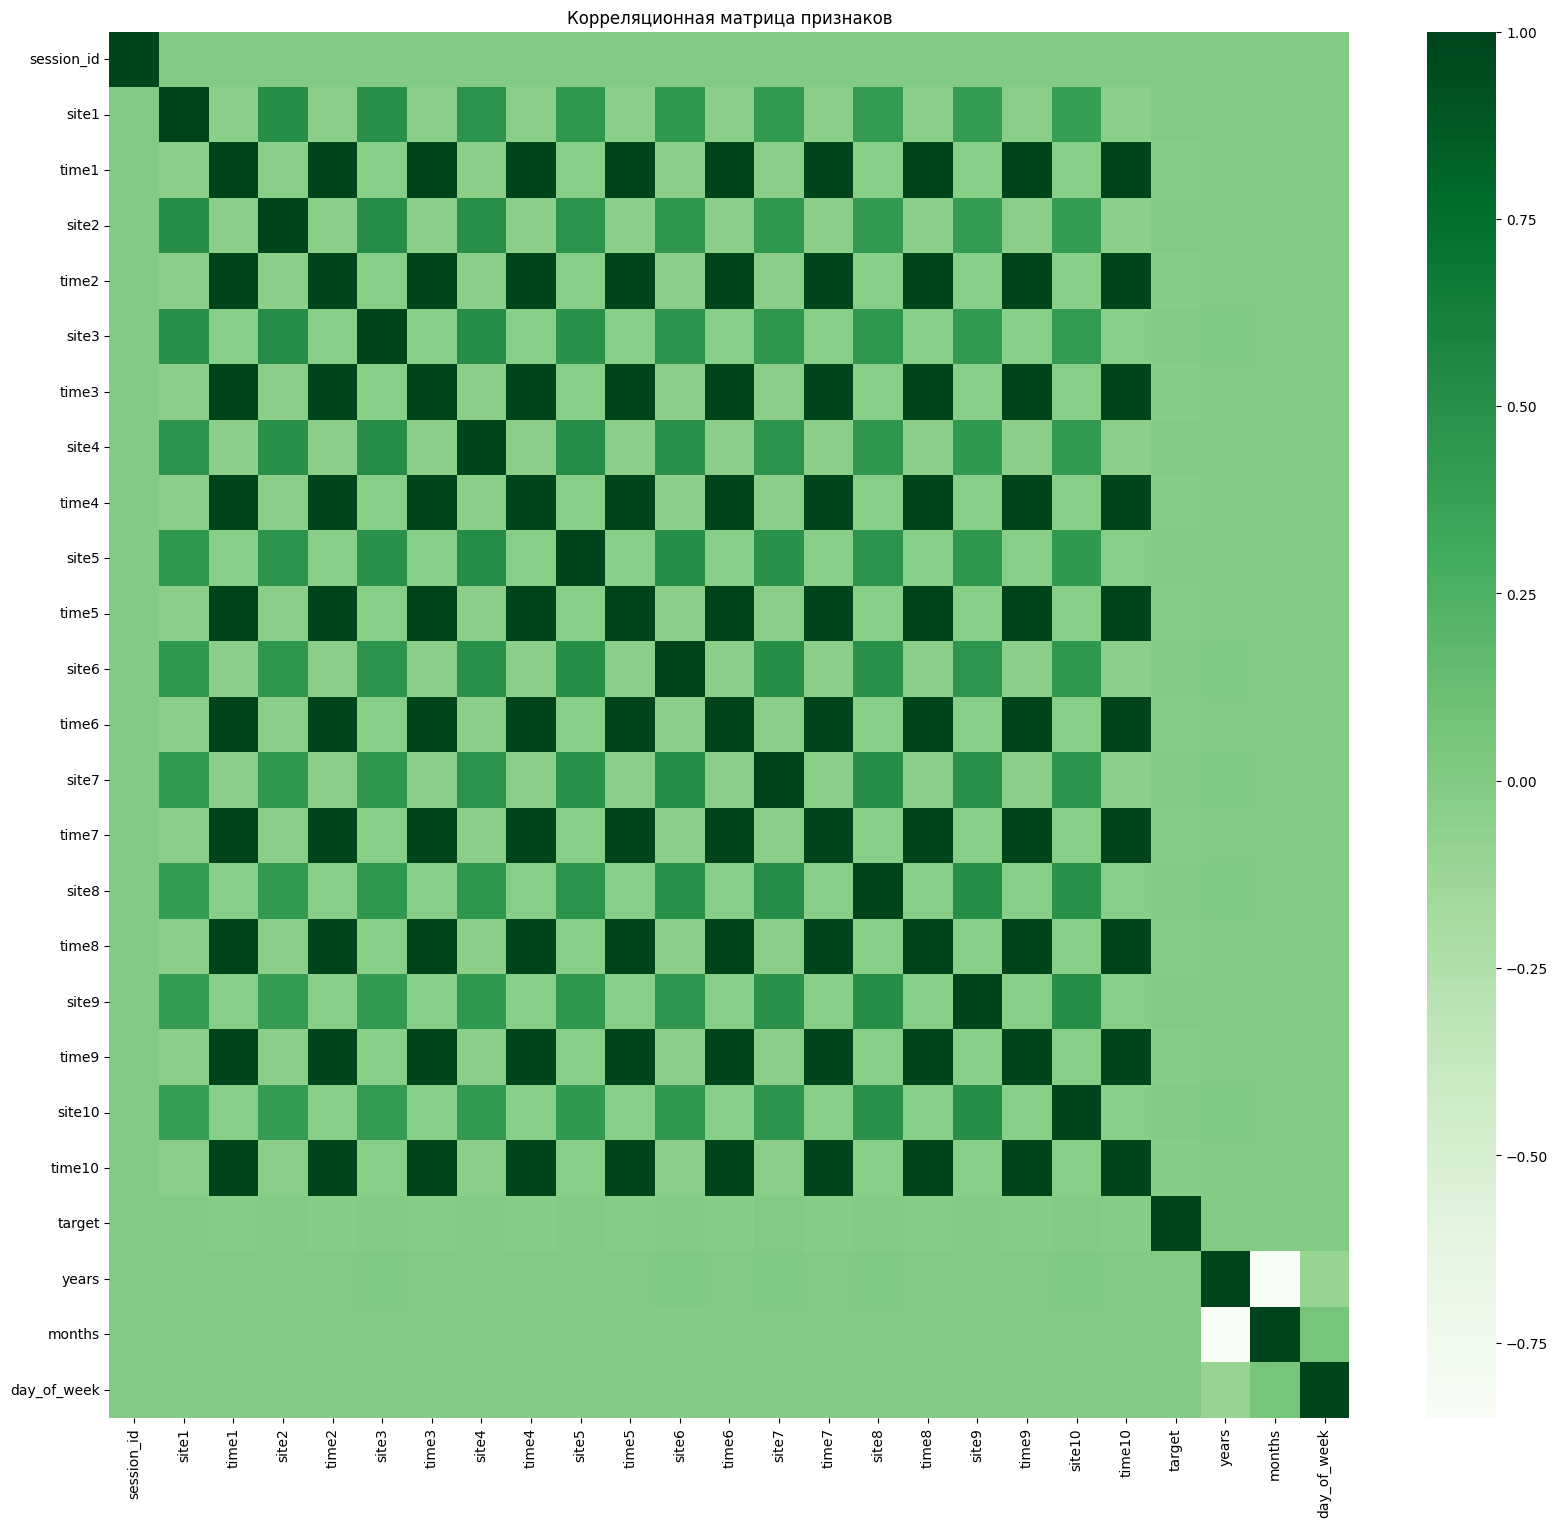

In [21]:
corr = filtered_train.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(corr, cmap="Greens", annot=False, fmt=".2f")
plt.title("Корреляционная матрица признаков")
plt.show()

С помощью матрицы корреляции я выяснил что больше всего на целевой показатель влияют месяцы и часы,день недели и года

In [22]:
# Вычисляем корреляцию для всех переменных
correlation_matrix = filtered_train.corr()


# Выбираем корреляцию с целевой переменной (target) и сортируем по убыванию
target_correlation = correlation_matrix["target"].drop("target")  # Убираем саму целевую переменную
highly_correlated = target_correlation[abs(target_correlation) > 0.001].sort_values(ascending=False)

# Выводим список наиболее коррелируемых переменных
print(highly_correlated)

years     0.001189
months   -0.002215
site7    -0.003354
site1    -0.003377
site4    -0.004623
site9    -0.004866
site6    -0.004915
site2    -0.005614
site3    -0.006333
site10   -0.006350
site5    -0.006603
site8    -0.007174
time1    -0.019901
time2    -0.019901
time3    -0.019901
time4    -0.019901
time5    -0.019901
time6    -0.019902
time7    -0.019902
time8    -0.019902
time9    -0.019902
time10   -0.019902
Name: target, dtype: float64


два графика

## 2.2  Конструирование признаков (Feature Engineering)

Создание признаков

In [23]:
def create_features_with_checks(df, time_columns):
    import pandas as pd

    # Проверяем наличие временных столбцов в DataFrame
    session_cols = [col for col in time_columns if col in df.columns]
    if not session_cols:
        raise ValueError("Ни один из указанных временных столбцов не найден в DataFrame.")

    print(f"Обнаружены временные столбцы: {session_cols}")

    # Создаем временный DataFrame для хранения округленных значений
    rounded_times = pd.DataFrame()

    # Преобразуем timestamp-столбцы в datetime и округляем до минут
    for col in session_cols:
        try:
            rounded_times[col] = pd.to_datetime(df[col], errors='coerce').dt.floor('min')
            print(f"Столбец {col} успешно преобразован и округлен.")
        except Exception as e:
            print(f"Ошибка при обработке столбца {col}: {e}")
            rounded_times[col] = pd.NaT

    # Проверяем наличие корректных дат после преобразования
    print("Количество пропусков в обработанных столбцах:")
    print(rounded_times.isnull().sum())

    # Выделяем начальную временную метку в сессии
    df['session_start'] = rounded_times.min(axis=1)
    if df['session_start'].isnull().all():
        raise ValueError("Все значения в 'session_start' оказались пустыми. Проверьте исходные данные.")

    # Проверяем диапазон полученных временных меток
    print(f"Диапазон session_start: {df['session_start'].min()} - {df['session_start'].max()}")

    # Проверяем признаки time1_month–time10_month
    for i in range(1, 11):  # Диапазон от 1 до 10
        column_name = f'time{i}_month'
        if column_name in df.columns:
            print(f"Уникальные значения {column_name}:", df[column_name].unique())
            print(f"Распределение данных для {column_name}:")
            print(df[column_name].value_counts())
        else:
            print(f"Столбец {column_name} отсутствует в DataFrame.")


    return df


filtered_train = create_features_with_checks(filtered_train, time_columns)
filtered_test = create_features_with_checks(filtered_test, time_columns)

Обнаружены временные столбцы: ['time1', 'time2', 'time3', 'time4', 'time5', 'time6', 'time7', 'time8', 'time9', 'time10']
Столбец time1 успешно преобразован и округлен.
Столбец time2 успешно преобразован и округлен.
Столбец time3 успешно преобразован и округлен.
Столбец time4 успешно преобразован и округлен.
Столбец time5 успешно преобразован и округлен.
Столбец time6 успешно преобразован и округлен.
Столбец time7 успешно преобразован и округлен.
Столбец time8 успешно преобразован и округлен.
Столбец time9 успешно преобразован и округлен.
Столбец time10 успешно преобразован и округлен.
Количество пропусков в обработанных столбцах:
time1     0
time2     0
time3     0
time4     0
time5     0
time6     0
time7     0
time8     0
time9     0
time10    0
dtype: int64
Диапазон session_start: 2013-01-12 08:50:00 - 2014-04-30 23:38:00
Столбец time1_month отсутствует в DataFrame.
Столбец time2_month отсутствует в DataFrame.
Столбец time3_month отсутствует в DataFrame.
Столбец time4_month отсутст

In [24]:
filtered_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231052 entries, 1 to 253560
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   session_id     231052 non-null  int64         
 1   site1          231052 non-null  int64         
 2   time1          231052 non-null  datetime64[ns]
 3   site2          231052 non-null  int64         
 4   time2          231052 non-null  datetime64[ns]
 5   site3          231052 non-null  int64         
 6   time3          231052 non-null  datetime64[ns]
 7   site4          231052 non-null  int64         
 8   time4          231052 non-null  datetime64[ns]
 9   site5          231052 non-null  int64         
 10  time5          231052 non-null  datetime64[ns]
 11  site6          231052 non-null  int64         
 12  time6          231052 non-null  datetime64[ns]
 13  site7          231052 non-null  int64         
 14  time7          231052 non-null  datetime64[ns]
 15  site8

In [25]:
def process_single_year_month_and_season(dataframe, season_mapping):
    # Создаем пустые списки для year_month и season
    all_year_months = []
    all_seasons = []

    # Проверяем, что колонки years и months существуют
    if 'years' in dataframe.columns and 'months' in dataframe.columns:
        # Добавляем значения year_month в общий список
        all_year_months = (dataframe['years'] * 100 + dataframe['months']).tolist()

        # Добавляем значения сезона в общий список
        all_seasons = dataframe['months'].map(
            lambda x: season_mapping[
                'winter' if x in [12, 1, 2] else
                'spring' if x in [3, 4, 5] else
                'summer' if x in [6, 7, 8] else
                'autumn'
            ]
        ).tolist()

    # Обновляем датафрейм с новыми колонками, обрезая лишние данные
    min_length = min(len(all_year_months), len(dataframe))
    dataframe['year_month'] = all_year_months[:min_length]
    dataframe['season'] = all_seasons[:min_length]

    return dataframe

# Пример использования
season_mapping = {'winter': 0, 'spring': 1, 'summer': 2, 'autumn': 3}

# Применяем функцию
filtered_train = process_single_year_month_and_season(filtered_train, season_mapping)
filtered_test = process_single_year_month_and_season(filtered_test, season_mapping)

In [26]:
filtered_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231052 entries, 1 to 253560
Data columns (total 28 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   session_id     231052 non-null  int64         
 1   site1          231052 non-null  int64         
 2   time1          231052 non-null  datetime64[ns]
 3   site2          231052 non-null  int64         
 4   time2          231052 non-null  datetime64[ns]
 5   site3          231052 non-null  int64         
 6   time3          231052 non-null  datetime64[ns]
 7   site4          231052 non-null  int64         
 8   time4          231052 non-null  datetime64[ns]
 9   site5          231052 non-null  int64         
 10  time5          231052 non-null  datetime64[ns]
 11  site6          231052 non-null  int64         
 12  time6          231052 non-null  datetime64[ns]
 13  site7          231052 non-null  int64         
 14  time7          231052 non-null  datetime64[ns]
 15  site8

In [27]:
def extract_time_features(data, time_columns):
    # Извлечение дня, часа, минуты, секунды и создание признака выходных
    for col in time_columns:
        data[f'{col}_hour'] = data[col].dt.hour
        data[f'{col}_minute'] = data[col].dt.minute


    # День в одной колонке (из первого временного столбца)
    data['day'] = data[time_columns[0]].dt.day

    # Признак выходного дня (на основе первого временного столбца)
    data['is_weekend'] = data[time_columns[0]].dt.dayofweek.isin([5, 6]).astype(int)

    return data



time_columns = [f'time{i}' for i in range(1, 11)]
filtered_train = extract_time_features(filtered_train, time_columns)
filtered_test = extract_time_features(filtered_test, time_columns)

filtered_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231052 entries, 1 to 253560
Data columns (total 50 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   session_id     231052 non-null  int64         
 1   site1          231052 non-null  int64         
 2   time1          231052 non-null  datetime64[ns]
 3   site2          231052 non-null  int64         
 4   time2          231052 non-null  datetime64[ns]
 5   site3          231052 non-null  int64         
 6   time3          231052 non-null  datetime64[ns]
 7   site4          231052 non-null  int64         
 8   time4          231052 non-null  datetime64[ns]
 9   site5          231052 non-null  int64         
 10  time5          231052 non-null  datetime64[ns]
 11  site6          231052 non-null  int64         
 12  time6          231052 non-null  datetime64[ns]
 13  site7          231052 non-null  int64         
 14  time7          231052 non-null  datetime64[ns]
 15  site8

In [28]:
# Преобразуем все значения в int64
filtered_train = filtered_train.astype('int64')
# Преобразуем все значения в int64
filtered_test = filtered_test.astype('int64')

In [29]:
filtered_train.tail(10)

session_id  site1                time1  site2                time2  \
253549      253550     77  1395661740000000000     75  1395661740000000000   
253551      253552    677  1392822300000000000    812  1392822300000000000   
253552      253553    778  1384504440000000000    780  1384504440000000000   
253553      253554  23797  1397567460000000000   1171  1397567460000000000   
253554      253555     71  1390987440000000000     29  1390987440000000000   
253555      253556   9041  1365772260000000000    291  1365772320000000000   
253556      253557   3474  1385375160000000000   3474  1385375160000000000   
253557      253558  12727  1363104060000000000  12727  1363104060000000000   
253559      253560    812  1387466400000000000    676  1387466400000000000   
253560      253561  34942  1398419760000000000   1429  1398419760000000000   

        site3                time3  site4                time4  site5  ...  \
253549     77  1395661740000000000     75  1395661740000000000     55  ...   
253551    812  1392822300000000000    774  1392822300000000000     22  ...   
253552    780  1384504440000000000    778  1384504500000000000    780  ...   
253553      3  1397567460000000000      3  1397567460000000000      8  ...   
253554    570  1390987440000000000     29  1390987440000000000      3  ...   
253555     23  1365772320000000000     52  1365772320000000000     23  ...   
253556    141  1385375220000000000   2428  1385375220000000000    106  ...   
253557   2215  1363104060000000000     38  1363104060000000000   2215  ...   
253559    814  1387466400000000000     22  1387466400000000000     39  ...   
253560  34942  1398419760000000000     29  1398419760000000000     30  ...   

        time7_hour  time7_minute  time8_hour  time8_minute  time9_hour  \
253549          11            50          11            50          11   
253551          15             9          15             9          15   
253552           8            35           8            35           8   
253553          13            11          13            11          13   
253554           9            25           9            25           9   
253555          13            12          13            12          13   
253556          10            27          10            27          10   
253557          16             1          16             1          16   
253559          15            20          15            20          15   
253560           9            56           9            56           9   

        time9_minute  time10_hour  time10_minute  day  is_weekend  
253549            50           11             50   24           0  
253551            14           15             14   19           0  
253552            35            8             35   15           0  
253553            11           13             11   15           0  
253554            25            9             25   29           0  
253555            12           13             12   12           0  
253556            27           10             27   25           0  
253557             1           16              1   12           0  
253559            20           15             20   19           0  
253560            56            9             56   25           0  

[10 rows x 50 columns]

In [30]:
filtered_train = filtered_train.drop(columns=['time1','time2','time3','time4','time5','time6','time7','time8','time9','time10',])
filtered_test = filtered_test.drop(columns=['time1','time2','time3','time4','time5','time6','time7','time8','time9','time10',])

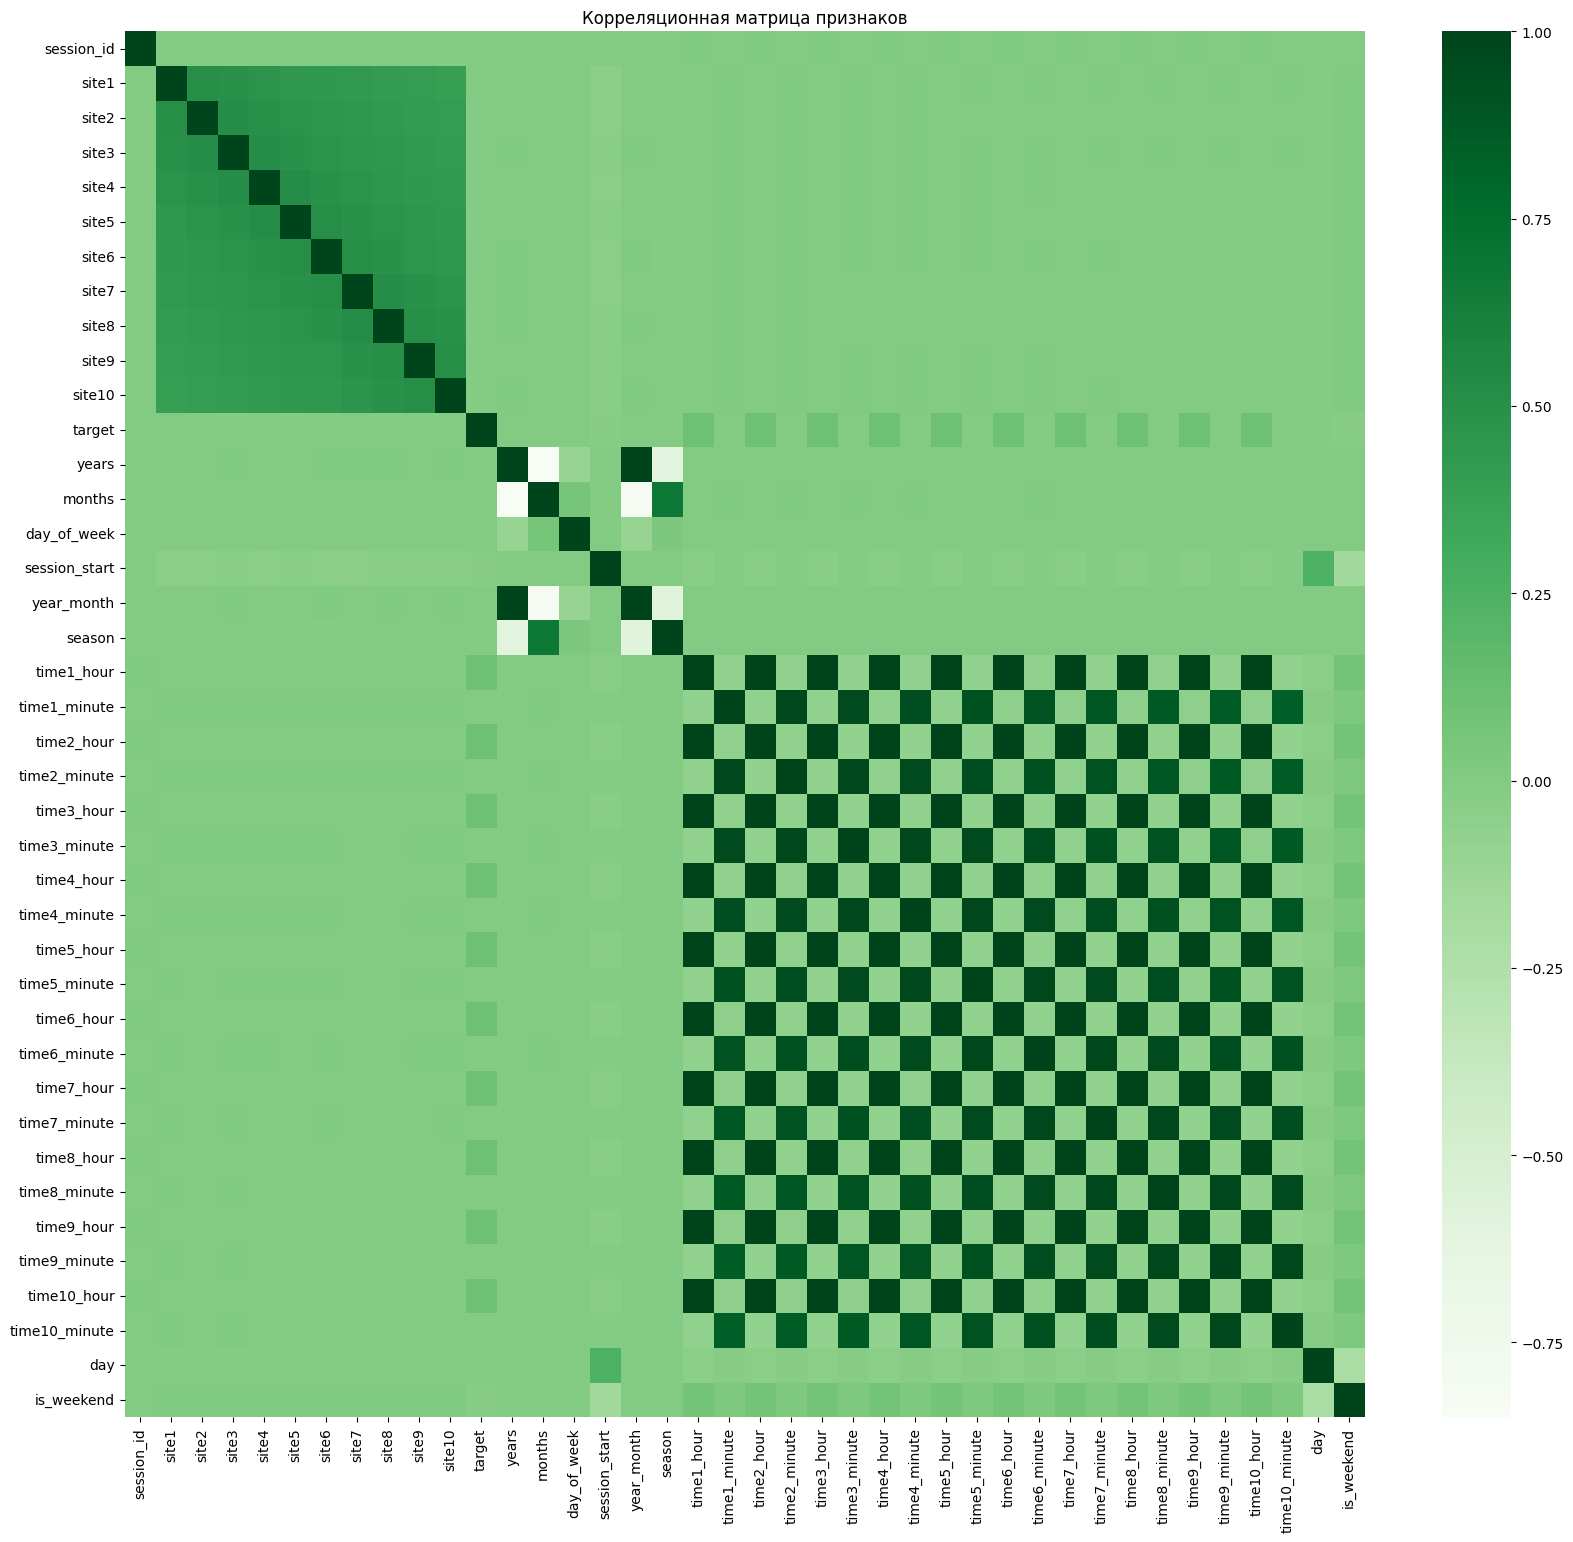

In [31]:
corr = filtered_train.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(corr, cmap="Greens", annot=False, fmt=".2f")
plt.title("Корреляционная матрица признаков")
plt.show()

По матрице видно что колонки с выходными и началом сессии и часом  неплохо коррелируют с  target

In [32]:
# Уникальные значения для каждого столбца в виде списка
for column in filtered_train.columns:
    unique_values = filtered_train[column].unique().tolist()
    print(f"Уникальные значения в столбце '{column}': {unique_values}")

Уникальные значения в столбце 'session_id': [2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 229, 230, 

## 2.3 Создание отчета

# **3 Сессия**

## 3.1 Сравнение нескольких алгоритмов

Импорт библиотек и разбиение данных

In [33]:

!pip install scikit-learn==1.3.2

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.utils.class_weight import compute_class_weight



In [34]:
filtered_train.to_csv("filtered_train.csv", index=False)

In [35]:
# Разделение данных
X = filtered_train.drop(columns=["target"])
y = filtered_train["target"]


# Вычисление весов классов
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights_dict = dict(enumerate(class_weights))


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.35, random_state=42, stratify=y)

In [38]:
from imblearn.over_sampling import SMOTE

# Балансировка классов с помощью SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [39]:
# Сохранение сбалансированных данных после SMOTE
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), y_resampled.reset_index(drop=True)], axis=1)
resampled_data.to_csv("resampled_train_data.csv", index=False)
print("Сбалансированные обучающие данные сохранены как 'resampled_train_data.csv'")

Сбалансированные обучающие данные сохранены как 'resampled_train_data.csv'


Обучение моделей

In [40]:
from sklearn.metrics import roc_auc_score, f1_score, log_loss

models = {
    "Logistic Regression": LogisticRegression(max_iter=150, random_state=42, class_weight="balanced", C=50),
    "Random Forest": RandomForestClassifier(n_estimators=45, random_state=42, class_weight="balanced", max_depth=20),
    "XGBoost": XGBClassifier(
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42,
        scale_pos_weight=class_weights[1] / class_weights[0],  # балансировка
        reg_lambda=0.01,  # L2-регуляризация
        reg_alpha=0.01,  # L1-регуляризация
        max_depth=20,
        learning_rate=0.5
    ),
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to class predictions

    auc_score = roc_auc_score(y_val, y_pred_proba)
    f1 = f1_score(y_val, y_pred)
    logloss = log_loss(y_val, y_pred_proba)

    results[name] = {'ROC AUC': auc_score, 'F1-score': f1, 'Log Loss': logloss}

    print(f"{name}:")
    print(f"  ROC AUC = {auc_score:.4f}")
    print(f"  F1-score = {f1:.4f}")
    print(f"  Log Loss = {logloss:.4f}")

# Определение лучшей модели (по ROC AUC)
best_model_name = max(results, key=lambda x: results[x]['ROC AUC'])
best_model = models[best_model_name]
print(f"\nЛучшей моделью оказалась: {best_model_name}")
print(f"  ROC AUC = {results[best_model_name]['ROC AUC']:.4f}")
print(f"  F1-score = {results[best_model_name]['F1-score']:.4f}")
print(f"  Log Loss = {results[best_model_name]['Log Loss']:.4f}")

Logistic Regression:
  ROC AUC = 0.8388
  F1-score = 0.0498
  Log Loss = 0.5254
Random Forest:
  ROC AUC = 0.9764
  F1-score = 0.4744
  Log Loss = 0.0485
XGBoost:
  ROC AUC = 0.9958
  F1-score = 0.7801
  Log Loss = 0.0140

Лучшей моделью оказалась: XGBoost
  ROC AUC = 0.9958
  F1-score = 0.7801
  Log Loss = 0.0140


## 3.2 Гиперпараметрическая оптимизация модели

Настройка гиперпараметров для лучшей модели

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, log_loss

# Настройка гиперпараметров для XGBoost
param_dist = {
    "n_estimators": [50, 100, 150, 200],
    "max_depth": [3, 4, 5, 6],
    "learning_rate": [0.01, 0.1, 0.2],  # Removed duplicate value
    "reg_lambda": np.linspace(1, 10, 5),  # Corrected the function call
    "reg_alpha": np.linspace(0.1, 10, 5),
}

random_search = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42, scale_pos_weight=class_weights[1] / class_weights[0]),
    param_distributions=param_dist,
    n_iter=50,  # Количество итераций
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

# Лучшая модель и параметры
best_params = random_search.best_params_
best_model = random_search.best_estimator_
print(f"Лучшие параметры: {best_params}")
print(f"Лучший ROC AUC на валидации: {random_search.best_score_:.4f}")

# Предсказания на валидационной выборке
y_pred = best_model.predict(X_val)
y_pred_proba = best_model.predict_proba(X_val)[:, 1]

# F1-score
print("F1-score на валидации:")
print(classification_report(y_val, y_pred))

# Logloss
logloss = log_loss(y_val, y_pred_proba)
print(f"Logloss на валидации: {logloss:.4f}")

Лучшие параметры: {'reg_lambda': 7.75, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.2}
Лучший ROC AUC на валидации: 0.9963
F1-score на валидации:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     80079
           1       0.59      0.92      0.71       790

    accuracy                           0.99     80869
   macro avg       0.79      0.96      0.86     80869
weighted avg       1.00      0.99      0.99     80869

Logloss на валидации: 0.0193


In [42]:
from joblib import dump

# Сохранение лучшей обученной модели
model_path = "best_xgboost_model.joblib"  # Укажите путь для сохранения модели
dump(best_model, model_path)
print(f"Лучшая модель сохранена в: {model_path}")

Лучшая модель сохранена в: best_xgboost_model.joblib


Построение кривых

In [ ]:
from sklearn.model_selection import learning_curve

# Кривая обучения
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10,4),
    scoring="roc_auc", cv=5, n_jobs=-1
)

mean_train_score = np.mean(train_scores, axis=1)
mean_test_score = np.mean(test_scores, axis=1)

plt.plot(train_sizes, mean_train_score, label="Training score")
plt.plot(train_sizes, mean_test_score, label="Validation score")
plt.xlabel("Training Set Size")
plt.ylabel("ROC AUC Score")
plt.title("Learning Curve with Regularization")
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
import numpy as np

# Кривая валидации
param_range = [50, 100, 150]
train_scores, test_scores = validation_curve(
    XGBClassifier(
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42,
        scale_pos_weight=class_weights[1] / class_weights[0],
        reg_lambda=0.1,
        reg_alpha=0.3
    ),
    X_train, y_train, param_name="n_estimators", param_range=param_range,
    scoring="roc_auc", cv=5, n_jobs=-1
)

mean_train_score = np.mean(train_scores, axis=1)
mean_test_score = np.mean(test_scores, axis=1)

plt.plot(param_range, mean_train_score, label="Training score")
plt.plot(param_range, mean_test_score, label="Validation score")
plt.xlabel("Number of Estimators")
plt.ylabel("ROC AUC Score")
plt.title("Validation Curve with Regularization")
plt.legend()
plt.show()

## 3.3 Прогноз на тестовой выборке

Обучение на всей выборке и прогноз


In [ ]:
from sklearn.preprocessing import StandardScaler

# Стандартизация для тренировочной выборки
scaler_train = StandardScaler()
X_scaled = scaler_train.fit_transform(X)

# Стандартизация для тестовой выборки
scaler_test = StandardScaler()
filtered_test_scaled = scaler_test.fit_transform(filtered_test)

# Обучение модели
best_model.fit(X_resampled, y_resampled)

# Предсказания вероятностей для тестовой выборки
test_predictions = best_model.predict_proba(filtered_test_scaled)[:, 1]

# Сохранение результатов в файл
submission = pd.DataFrame({"session_id": filtered_test.index, "target": test_predictions})
submission.to_csv("sample_sub.csv", index=False)
print("Предсказания сохранены в файл sample_sub.csv")

print("Минимальное значение предсказания:", test_predictions.min())
print("Максимальное значение предсказания:", test_predictions.max())

In [ ]:
# 10. График распределения предсказаний
sns.histplot(test_predictions, kde=True, bins=30, color="skyblue", edgecolor="black")
plt.title("Распределение предсказаний модели")
plt.xlabel("Предсказание вероятности")
plt.ylabel("Частота")
plt.show()

Ye